# Interacting with Crystal Structures


## Installation


First, we need to install Pymatgen. To install a Python package, use `uv pip install <Package Name>`. The Python package must be listed on [PyPI](https://pypi.org/) for this to work. Install Pymatgen below.


```bash
conda activate cms
uv pip install pymatgen
```


## Example


We will read in an example CIF of a material known as a zeolite, which is a silicate material. The zeolite we are studying here is called sodalite and has the framework code SOD. It can be downloaded from the [IZA Database](https://america.iza-structure.org/IZA-SC/framework.php?ID=221).


In [2]:
from pymatgen.core import Structure

In [3]:
structure = Structure.from_file("SOD.cif")

In [4]:
structure

Structure Summary
Lattice
    abc : 8.965 8.965 8.965
 angles : 90.0 90.0 90.0
 volume : 720.528032125
      A : np.float64(8.965) np.float64(0.0) np.float64(5.489479277178011e-16)
      B : np.float64(1.4416819554351047e-15) np.float64(8.965) np.float64(5.489479277178011e-16)
      C : np.float64(0.0) np.float64(0.0) np.float64(8.965)
    pbc : True True True
PeriodicSite: Si1 (Si) (2.241, 4.482, 4.117e-16) [0.25, 0.5, 0.0]
PeriodicSite: Si2 (Si) (6.724, 0.0, 4.482) [0.75, 0.0, 0.5]
PeriodicSite: Si3 (Si) (3.604e-16, 2.241, 4.482) [0.0, 0.25, 0.5]
PeriodicSite: Si4 (Si) (4.483, 6.724, 6.862e-16) [0.5, 0.75, 0.0]
PeriodicSite: Si5 (Si) (4.482, 0.0, 2.241) [0.5, 0.0, 0.25]
PeriodicSite: Si6 (Si) (7.208e-16, 4.482, 6.724) [0.0, 0.5, 0.75]
PeriodicSite: Si7 (Si) (4.482, 0.0, 6.724) [0.5, 0.0, 0.75]
PeriodicSite: Si8 (Si) (7.208e-16, 4.482, 2.241) [0.0, 0.5, 0.25]
PeriodicSite: Si9 (Si) (6.724, 4.482, 6.862e-16) [0.75, 0.5, 0.0]
PeriodicSite: Si10 (Si) (2.241, 0.0, 4.482) [0.25, 0.0, 0.5]


The Pymatgen `Structure` object encodes lots of information about the material. To see all the attributes and methods available to the `Structure` object, you can use the auto-completed feature of VS Code (`structure.`), "inspect" the `Structure` class in VS Code, or run `dir(structure)`.


In [5]:
print(f"We have {len(structure)} atoms in the unit cell.")
print(f"The lattice parameters are: {structure.lattice.abc}")
print(f"The lattice angles are: {structure.lattice.angles}")
print(f"The composition is: {structure.composition}")

We have 36 atoms in the unit cell.
The lattice parameters are: (8.965, 8.965, 8.965)
The lattice angles are: (90.0, 90.0, 90.0)
The composition is: Si12 O24


Let's make a supercell now.


In [6]:
structure *= (2, 2, 2)

In [7]:
print(f"After making the supercell, we have {len(structure)} atoms in the unit cell.")

After making the supercell, we have 288 atoms in the unit cell.


Let's write out the supercell to a new CIF.


In [8]:
structure.to(filename="SOD_supercell.cif")

c:\Users\asros\miniconda3\envs\cms\Lib\site-packages\pymatgen\core\structure.py:2945: UserWarning: Site labels are not unique, which is not compliant with the CIF spec (https://www.iucr.org/__data/iucr/cifdic_html/1/cif_core.dic/Iatom_site_label.html):`['Si1', 'Si1', 'Si1', 'Si1', 'Si1', 'Si1', 'Si1', 'Si1', 'Si2', 'Si2', 'Si2', 'Si2', 'Si2', 'Si2', 'Si2', 'Si2', 'Si3', 'Si3', 'Si3', 'Si3', 'Si3', 'Si3', 'Si3', 'Si3', 'Si4', 'Si4', 'Si4', 'Si4', 'Si4', 'Si4', 'Si4', 'Si4', 'Si5', 'Si5', 'Si5', 'Si5', 'Si5', 'Si5', 'Si5', 'Si5', 'Si6', 'Si6', 'Si6', 'Si6', 'Si6', 'Si6', 'Si6', 'Si6', 'Si7', 'Si7', 'Si7', 'Si7', 'Si7', 'Si7', 'Si7', 'Si7', 'Si8', 'Si8', 'Si8', 'Si8', 'Si8', 'Si8', 'Si8', 'Si8', 'Si9', 'Si9', 'Si9', 'Si9', 'Si9', 'Si9', 'Si9', 'Si9', 'Si10', 'Si10', 'Si10', 'Si10', 'Si10', 'Si10', 'Si10', 'Si10', 'Si11', 'Si11', 'Si11', 'Si11', 'Si11', 'Si11', 'Si11', 'Si11', 'Si12', 'Si12', 'Si12', 'Si12', 'Si12', 'Si12', 'Si12', 'Si12', 'O1', 'O1', 'O1', 'O1', 'O1', 'O1', 'O1', 'O1', 'O

"# generated using pymatgen\ndata_SiO2\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   17.93000000\n_cell_length_b   17.93000000\n_cell_length_c   17.93000000\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   SiO2\n_chemical_formula_sum   'Si96 O192'\n_cell_volume   5764.22425700\n_cell_formula_units_Z   96\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Si  Si1  1  0.12500000  0.25000000  1.00000000  1.0\n  Si  Si1  1  0.12500000  0.25000000  0.50000000  1.0\n  Si  Si1  1  0.12500000  0.75000000  0.00000000  1.0\n  Si  Si1  1  0.12500000  0.75000000  0.50000000  1.0\n  Si  Si1  1  0.62500000  0.25000000  0.00000000  1.0\n  Si  Si1  1  0.62500000  0.25000000  

We can read in the supercell but automatically convert it to a primitive cell.


In [9]:
structure = Structure.from_file("SOD_supercell.cif", primitive=True)
print(
    f"After converting to primitive cell, we have {len(structure)} atoms in the unit cell."
)

After converting to primitive cell, we have 18 atoms in the unit cell.


In addition to opening the CIF in VESTA, we can use the [MatterViz](https://marketplace.visualstudio.com/items?itemName=Janosh.matterviz) VS Code extension to interact with material data.


# Constructing Powder XRD Patterns


In [10]:
import matplotlib.pyplot as plt
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [11]:
from matplotlib import rcParams

rcParams.update(
    {
        "font.size": 14,
        "axes.labelsize": 16,
        "axes.titlesize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
    }
)


In [12]:
pattern = XRDCalculator().get_pattern(structure)

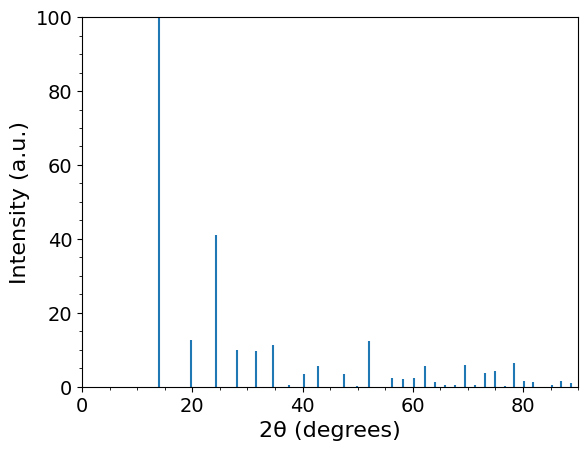

In [13]:
fig, ax = plt.subplots()
ax.vlines(pattern.x, ymin=0, ymax=pattern.y)
plt.xlabel("2θ (degrees)")
plt.ylabel("Intensity (a.u.)")
plt.xlim([0, 90])
plt.ylim([0, 100])
ax.minorticks_on()

We can compare the result to that obtained from VESTA and find that they are effectively the same plot.
